In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

In [2]:
os.getcwd()

'/Users/gwynethvolkmann'

In [3]:
path = '/Users/gwynethvolkmann/Downloads/relax_challenge'
os.chdir(path) 

In [4]:
os.getcwd()

'/Users/gwynethvolkmann/Downloads/relax_challenge'

In [5]:
df1 = pd.read_csv('takehome_users.csv', encoding='latin-1',parse_dates=True)
df2 = pd.read_csv('takehome_user_engagement.csv', parse_dates=True)

In [6]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
df2.time_stamp = pd.to_datetime(df2.time_stamp)
df2 = df2.set_index('time_stamp', drop= True)

In [14]:
df2.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [9]:
def label_adopted(x):    
    "takes a users input and returns whether or not they have been active within any 7-day period"
    df_temp = df2.loc[df2['user_id'] == x] 
    df_temp = df_temp.resample('D').mean().dropna() 
    adopted = 0
    for i in range(len(df_temp)-2): 
        if df_temp.index[i + 2] - df_temp.index[i] <= timedelta(days=7): 
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [10]:
df1['adopted_user'] = df1['object_id'].apply(label_adopted)

In [11]:
print(sum(df1['adopted_user']))
print(sum(df1.adopted_user)/len(df1.adopted_user))

1656
0.138


From this, we can see there are 1,656 users that can be classified as adopted due to having used the platform on three separate days in a 7 day period. This is 13.8% of the total number of registered users. 

In [24]:
from sklearn.preprocessing import LabelEncoder
import datetime

In [16]:
df1['creation_time']=pd.to_datetime(df1['creation_time'])

In [28]:
df1['last_session_creation_time'] = df1['last_session_creation_time'].map(lambda data: 
                                    datetime.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'),
                                                                              na_action='ignore')

In [30]:
df1['last_session_creation_time'] = pd.to_datetime(df1['last_session_creation_time'])
df1['usage_length'] = df1['last_session_creation_time'] - df1['creation_time']
df1['usage_length'] = [x.total_seconds() for x in df1['usage_length']]

In [32]:
df1.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
adopted_user                     0
usage_length                  3177
dtype: int64

In [33]:
df1.invited_by_user_id = df1.invited_by_user_id.fillna(0)

In [34]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 23:53:30,1,0,11,10803.0,0,-14400.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 23:45:04,0,0,1,316.0,1,11736000.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 19:14:52,0,0,94,1525.0,0,-14400.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 04:09:28,0,0,1,5151.0,0,72000.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 05:14:20,0,0,193,5240.0,0,414000.0


In [35]:
model_df = df1.iloc[:,4:]
model_df = model_df.drop('last_session_creation_time', axis=1)
model_df['usage_length'] = model_df['usage_length'].fillna(0)

In [36]:
model_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length
0,GUEST_INVITE,1,0,11,10803.0,0,-14400.0
1,ORG_INVITE,0,0,1,316.0,1,11736000.0
2,ORG_INVITE,0,0,94,1525.0,0,-14400.0
3,GUEST_INVITE,0,0,1,5151.0,0,72000.0
4,GUEST_INVITE,0,0,193,5240.0,0,414000.0


In [37]:
le=LabelEncoder()
creation_le = le.fit_transform(model_df['creation_source'])
model_df.creation_source = creation_le

In [38]:
model_df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,usage_length
0,0,1,0,11,10803.0,0,-14400.0
1,1,0,0,1,316.0,1,11736000.0
2,1,0,0,94,1525.0,0,-14400.0
3,0,0,0,1,5151.0,0,72000.0
4,0,0,0,193,5240.0,0,414000.0


In [54]:
from sklearn.model_selection import train_test_split

X = model_df.drop('adopted_user', axis=1)
y = model_df.adopted_user

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [56]:
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
usage_length,7.426360e-07
enabled_for_marketing_drip,-2.039590e-05
opted_in_to_mailing_list,-3.331333e-05
creation_source,-3.518397e-04
invited_by_user_id,-4.082051e-04
org_id,-1.980547e-02


In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))

[[3255  143]
 [  88  474]]


In [69]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

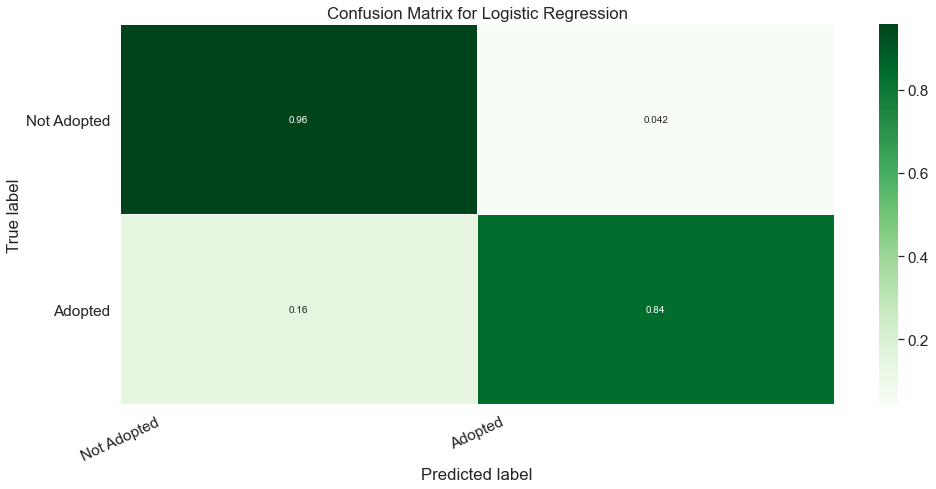

In [62]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Not Adopted', 'Adopted']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3398
           1       0.77      0.84      0.80       562

    accuracy                           0.94      3960
   macro avg       0.87      0.90      0.88      3960
weighted avg       0.94      0.94      0.94      3960



Based on the confusion matrix and the classification report, the logistic regression model performed very well on the data and had a high percentage of correct classifications. The coefficient most highly correlated to whether a user would ultimately adopt the platform is usage length in this particular model. 

In [72]:
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.967
Random Forest: f1-score=0.967


6


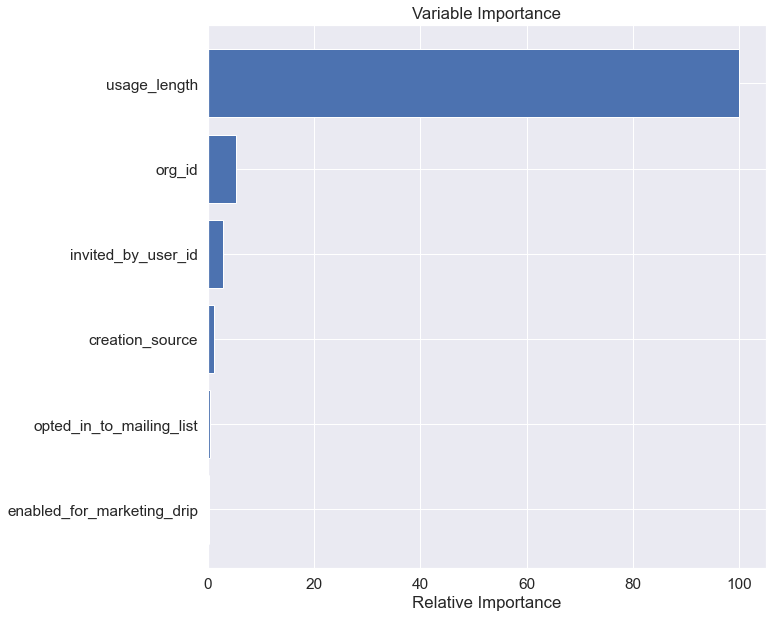

In [73]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

For the Random Forest model, the most important variable is usage length once again. After this org_id and invited_by_user id are most important. This may reflect that users that signed up ealier may be more likely to adopt the platform. Users that have been invited by another user might also be more likely to adopt the product as someone who knows that person has selected them as someone who might find it useful. 

I would use the Random Forest Classifier for this problem as it is slightly more accurate. The finidng in both models that usage time is the greatest predictor of whether a user will adopt the product makes sense since using the product for a longer time indicates increased usefulness and dependence for the users. 